## Segementation

In [1]:
from albumentations.augmentations.crops.transforms import RandomCrop
from albumentations.augmentations.geometric.rotate import Rotate
from albumentations.augmentations.transforms import HorizontalFlip, RGBShift
import cv2
import albumentations as A
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
image = Image.open("C:\\Users\\91865\\Desktop\\Deep-Learning-Handbook\\Albumenations\\images\\elon.jpeg")
image.show()

mask = Image.open("C:\\Users\\91865\\Desktop\\Deep-Learning-Handbook\\Albumenations\\images\\mask.jpeg")
mask.show()

In [4]:
transform = A.Compose([
    A.Resize(width = 224, height = 224),
    A.RandomCrop(width = 224, height = 224),
    A.Rotate(limit = 40, p = 0.9, border_mode = cv2.BORDER_CONSTANT), 
    A.HorizontalFlip(p = 0.5),
    A.VerticalFlip(p = 0.1),
    A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25, p=0.9),
        A.OneOf([
            A.Blur(blur_limit=3, p=0.5),
            A.ColorJitter(p=0.5),
        ], p=1.0),])

In [9]:
image_list = [image]
image = np.array(image)
mask = np.array(mask) # np.asarray(mask), np.array(mask)

for i in range(10):
    augmentations = transform(image=image,mask = mask)
    augmented_img = augmentations['image']
    augmented_masks = augmentations["mask"]
    image_list.append(augmented_img)
    image_list.append(augmented_masks)

In [7]:
def plot_examples(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        if bboxes is not None:
            img = visualize_bbox(images[i - 1], bboxes[i - 1], class_name="Elon")
        else:
            img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

ValueError: num must be 1 <= num <= 20, not 21

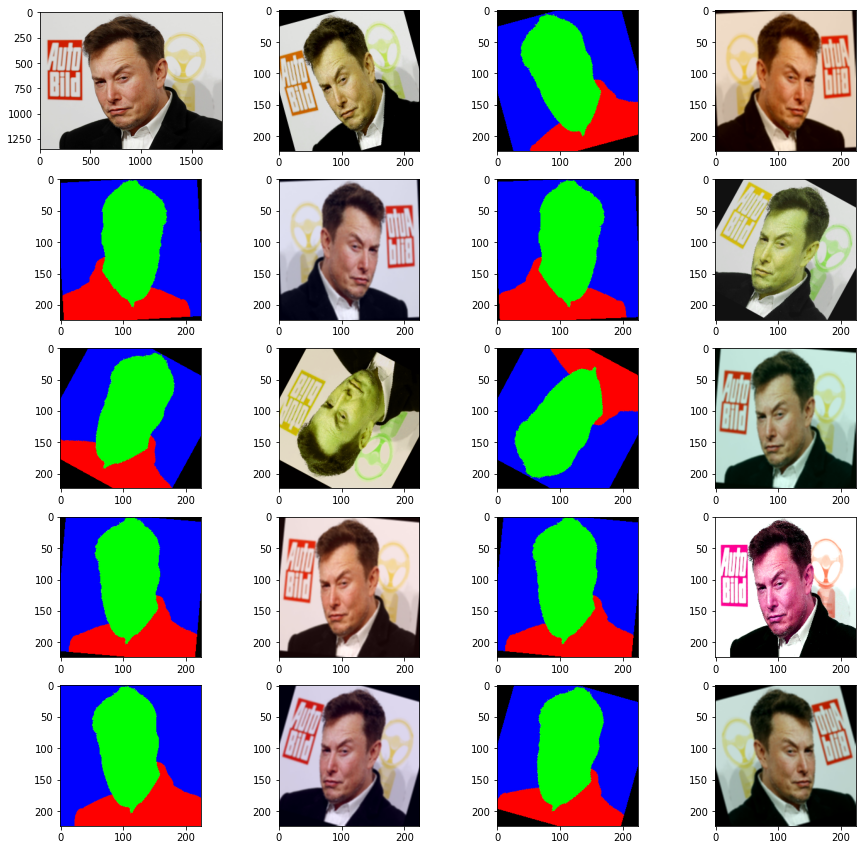

In [10]:
plot_examples(image_list)